In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

TensorFlow 2.x selected.


In [0]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
maxlen = 200

In [0]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

In [0]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/12
22500/22500 [==============================] - 27s 1ms/sample - loss: 0.6697 - accuracy: 0.6129 - val_loss: 0.6286 - val_accuracy: 0.7296
Epoch 2/12
22500/22500 [==============================] - 25s 1ms/sample - loss: 0.5692 - accuracy: 0.7759 - val_loss: 0.5485 - val_accuracy: 0.7400
Epoch 3/12
22500/22500 [==============================] - 25s 1ms/sample - loss: 0.4585 - accuracy: 0.8303 - val_loss: 0.4288 - val_accuracy: 0.8336
Epoch 4/12
22500/22500 [==============================] - 25s 1ms/sample - loss: 0.3716 - accuracy: 0.8612 - val_loss: 0.3807 - val_accuracy: 0.8448
Epoch 5/12
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.3135 - accuracy: 0.8823 - val_loss: 0.3757 - val_accuracy: 0.8444
Epoch 6/12
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.2728 - accuracy: 0.8986 - val_loss: 0.3369 - val_accuracy: 0.8640
Epoch 7/12
22500/22500 [==============================] -

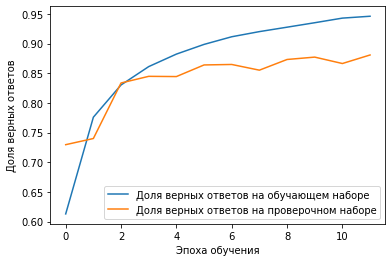

In [12]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)

25000/25000 [==============================] - 15s 595us/sample - loss: 0.4155 - accuracy: 0.8502
